<a href="https://colab.research.google.com/github/soupdoumplings/5CS037-Assignment1-HDI-Analysis--UjwalShrestha-/blob/main/np03cs4a240006_UjwalShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment I: Statistical Interpretation and Exploratory Data Analysis
## Analysis of the Human Development Index (HDI)

**Course:** 5CS037 – Concepts and Technologies of AI  
**Student Name:** Ujwal Shrestha
**College:** Herald College, Kathmandu
**StudentID:** np03cs4a240006  
**Date:** January 2026


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

pd.set_option('display.max_columns', None)

hdi_dataset = pd.read_csv(
    "/content/Human_Development_Index_Dataset.csv",
    encoding='latin1'
)

hdi_dataset.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [ ]:
null_checker_series = hdi_dataset.isnull().sum()
print(null_checker_series)

Unnamed: 0                      0
iso3                            0
country                         0
year                            0
hdi                           627
life_expectancy                 0
pop_millions                    0
hdi_f                        1784
hdi_m                        1784
life_expec_f                    0
life_expec_m                    0
expec_yr_school               248
expec_yr_school_f             528
expec_yr_school_m             528
mean_yr_school                544
mean_yr_school_f              634
mean_yr_school_m              634
gross_inc_percap              139
gross_inc_percap_f           1506
gross_inc_percap_m           1506
gender_development           1784
gender_inequality            2087
secondary_education_f_%       981
secondary_education_m_%       981
seats_in_parliament_f_%       529
seats_in_parliament_m_%       529
labour_participation_f_%     1488
labour_participation_m_%     1488
co2_emission_tons              85
mat_footprint_

In [ ]:
# Identify unique years
hdi_dataset['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
hdi_2022_df  = hdi_dataset[hdi_dataset['year'] == 2022].copy()


In [ ]:
print ("The first 10 rows of HDI dataset for 2022:")

hdi_2022_df.head(10)

The first 10 rows of HDI dataset for 2022:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [ ]:
print(
    f"The shape of HDI dataset for 2022: {hdi_2022_df.shape}\n\n"
    f"Here, rows: {hdi_2022_df.shape[0]} and columns: {hdi_2022_df.shape[1]}"
)



The shape of HDI dataset for 2022: (206, 30)

Here, rows: 206 and columns: 30


In [ ]:
# Column names and data types
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

In [ ]:
# Checking all null values in HDI dataset 2022
null_check_hdi_2022 = hdi_2022_df.isnull().sum()
print(
    "The total sum of null values for each column in HDI dataset 2022:\n"
    f"{null_check_hdi_2022}"
    )


The total sum of null values for each column in HDI dataset 2022:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_fo

In [ ]:
duplicate_check_hdi_2022 = hdi_2022_df.duplicated().sum()
print(
    "The total sum of duplicate values for each column in HDI dataset 2022:\n"
    f"{duplicate_check_hdi_2022}"
    )

The total sum of duplicate values for each column in HDI dataset 2022:
0


In [ ]:
hdi_2022_df.dtypes


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [ ]:
invalid_values_hdi_2022 = ((hdi_2022_df == 0) | (hdi_2022_df == "-")).sum()
print(f"Total invalid values in each columns: \n{invalid_values_hdi_2022}")


Total invalid values in each columns: 
Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


In [ ]:
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])

hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [ ]:
numeric_cols_2022 = hdi_2022_df.select_dtypes(
    include=['float64', 'int64']
    ).columns

for cols in numeric_cols_2022:

  if hdi_2022_df[cols].isnull().sum() > 0:
    skewness = hdi_2022_df[cols].skew()

    if abs(skewness) > 1:
      fill_value = hdi_2022_df[cols].median()
      print(f"{cols}: imputed with median")

    else:
      fill_value = hdi_2022_df[cols].mean()
      print(f"{cols}: imputed with mean")

    hdi_2022_df[cols] = hdi_2022_df[cols].fillna(fill_value)

print("\nMissing values per column after dropping and imputing:")
print(hdi_2022_df.isnull().sum())


hdi_f: imputed with mean
hdi_m: imputed with mean
gross_inc_percap_f: imputed with median
gross_inc_percap_m: imputed with median
gender_development: imputed with median
gender_inequality: imputed with mean
secondary_education_f_%: imputed with mean
secondary_education_m_%: imputed with mean
seats_in_parliament_f_%: imputed with mean
seats_in_parliament_m_%: imputed with mean
labour_participation_f_%: imputed with mean
labour_participation_m_%: imputed with mean
co2_emission_tons: imputed with median
mat_footprint_percap_tons: imputed with median

Missing values per column after dropping and imputing:
Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f  

In [ ]:
print("Duplicate rows after dropping:")
print(hdi_2022_df.duplicated().sum())

Duplicate rows after dropping:
0


In [ ]:
hdi_2022_df.describe()

,Unnamed: 0,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
count,204.000000,204.0,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,3415.500000,2022.0,0.722887,71.791847,149.193857,0.706232,0.739213,74.460880,69.216988,13.514038,13.814739,13.266102,8.967164,8.694031,9.284921,20722.658911,15499.525989,25517.453662,0.948858,0.339458,61.001341,65.474886,25.197719,74.802281,49.707187,70.245368,4.313493,12.654721
std,1976.413624,0.0,0.153029,7.758711,669.679249,0.159868,0.138736,7.842292,7.755798,2.989232,3.361733,2.715467,3.177347,3.500822,2.882495,22105.824388,17198.785515,26103.474407,0.068561,0.179102,29.070841,25.872956,11.908262,11.908262,14.624355,9.765635,5.439369,9.912393
min,33.000000,2022.0,0.380000,52.997000,0.011312,0.219081,0.425211,53.968000,50.319000,5.634770,4.510310,6.738390,1.341352,0.885770,1.772790,690.660758,149.971667,789.456147,0.456000,0.009000,2.578340,4.483990,0.294118,45.283019,5.840000,29.630000,0.038126,1.180900
25%,1707.750000,2022.0,0.606500,65.946750,2.522508,0.582831,0.632112,68.927000,63.373750,11.716554,11.716569,11.497973,6.532591,5.716712,7.187221,4800.833454,3108.104433,6267.660123,0.926000,0.198750,39.090784,44.748512,17.291780,66.858974,43.372500,65.890000,0.795489,6.085750
50%,3415.500000,2022.0,0.739500,72.208000,10.054963,0.709703,0.743425,75.757500,69.313495,13.302535,13.937560,13.048012,9.220525,9.309753,9.199256,12663.864770,9515.281407,17213.531760,0.969000,0.339458,62.041213,65.474886,25.197719,74.802281,51.530000,70.245368,2.594252,9.966200
75%,5123.250000,2022.0,0.839500,77.753000,36.671108,0.828910,0.832965,80.316750,75.013750,15.579428,16.233325,15.194840,11.608587,11.657238,11.697338,32042.765448,22626.560255,37305.158455,0.989000,0.478250,86.147070,88.580997,33.141026,82.708220,59.015000,75.892500,5.558719,15.676900
max,6798.000000,2022.0,0.967000,84.820000,7940.608797,0.957148,0.977383,87.832000,83.019000,21.080021,21.981430,20.193760,14.255940,13.990300,14.535050,146673.241500,114828.834300,179045.068600,1.064000,0.820000,100.000000,100.000000,54.716981,99.705882,82.940000,98.580000,39.884274,63.591200


In [ ]:
max_hdi_2022 = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]

print(
    f"{max_hdi_2022['country']} has the highest HDI for 2022\n"
    f"with an HDI value of {max_hdi_2022['hdi']:.3f}"
    )

Switzerland has the highest HDI for 2022
with an HDI value of 0.967


In [ ]:
min_hdi_2022 = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]

print(
    f"{min_hdi_2022['country']} has the lowest HDI for 2022\n"
    f"with an HDI value of {min_hdi_2022['hdi']:.3f}"
    )

Somalia has the lowest HDI for 2022
with an HDI value of 0.380


In [ ]:
higher_hdi_dataset_2022 = hdi_2022_df.loc[hdi_2022_df['hdi'] > 0.800]

gni_sort_dataset_2022 = higher_hdi_dataset_2022.sort_values(
    by='gross_inc_percap', ascending=False
)
gni_sort_dataset_2022.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,83.019,15.466400,14.518240,16.434999,12.351169,12.090864,14.049712,146673.24150,114828.83430,179045.06860,0.949,0.339458,61.001341,65.474886,28.000000,72.000000,52.79,67.26,3.736776,9.9662
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,80.626,13.264270,15.289560,12.649090,10.131722,11.796383,9.737610,95944.37754,47963.67663,114134.84230,1.027,0.212000,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,81.981,16.902731,17.034019,16.810640,11.924880,11.627060,12.254710,88761.14559,76610.86780,99844.23650,0.991,0.036000,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,81.017,19.126101,19.475800,18.771580,11.656957,11.863226,11.437631,87467.51391,66876.42142,108423.61080,0.991,0.072000,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,80.445,14.197050,14.315570,14.088360,12.960081,12.934179,12.962670,78554.23640,66697.04897,90255.76002,0.993,0.043000,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,77.720,17.208139,19.753281,16.379900,12.773750,12.588370,12.905890,74103.71494,51509.56703,84087.84953,0.986,0.035000,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,82.484,16.583731,16.677860,16.498199,13.904066,13.549473,14.268536,69432.78669,56927.80503,82109.48430,0.971,0.018000,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,81.718,18.638460,19.521360,17.803841,13.062343,13.210113,12.912692,69189.76165,61067.47743,77164.33022,0.986,0.012000,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,75.479,16.412741,17.262751,15.585690,13.575500,13.653570,13.493290,65564.93798,53469.38514,77898.33045,1.005,0.180000,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,81.754,17.849590,17.872049,17.841379,12.347770,11.995980,12.788720,62485.50516,51562.96012,75269.83474,0.972,0.339458,77.866913,84.067802,25.197719,74.802281,52.91,64.71,4.373242,9.9662


In [ ]:
undp_contitions = [-np.inf, 0.549, 0.699, 0.799, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

hdi_2022_df['HDI_category'] = pd.cut(
    hdi_2022_df['hdi'], bins=undp_contitions, labels=labels
)

hdi_2022_df[['country', 'hdi', 'HDI_category']].head(10)


,country,hdi,HDI_category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium
197,Antigua and Barbuda,0.826,Very High
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High


In [ ]:
hdi_2022_df.to_csv('HDI category added.csv', index = False)

print("Successfully stored the updated HDI in HDI category added.csv")

Successfully stored the updated HDI in HDI category added.csv


In [ ]:
filter_yr = [2020, 2021, 2022]

hdi_2020_22_df = hdi_dataset[hdi_dataset['year'].isin(filter_yr)].copy()

hdi_2020_22_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
96,97,DZA,Algeria,2020,0.730,74.453,43.451666,0.666724,0.758643,75.912,73.082,15.302207,15.999701,14.634753,6.987444,6.490568,7.481537,10634.883980,3709.098381,17305.912600,0.879,0.396,42.910456,46.815170,21.061360,78.938640,17.53,65.59,3.909926,8.7299
97,98,DZA,Algeria,2021,0.740,76.377,44.177968,0.677675,0.768169,77.959,74.879,15.395043,16.131940,14.689317,6.987444,6.490568,7.481537,10823.118130,3786.828917,17604.030850,0.882,0.457,42.910456,46.815170,7.481752,92.518248,17.57,65.53,4.079540,8.6074
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
129,130,AND,Andorra,2020,0.843,79.023,0.077700,NaN,NaN,83.192,75.763,11.911930,11.877110,11.944830,11.260993,11.178576,11.343280,48026.390490,NaN,NaN,NaN,NaN,78.306798,80.787392,46.428571,53.571429,NaN,NaN,4.809910,NaN


In [ ]:
hdi_2020_22_df.to_csv('HDI problem1B.csv', index = False)

In [ ]:
specific_null_check_2020_22 = hdi_2020_22_df[['hdi', 'country', 'year']].isnull().sum()

print("Missing values in 'hdi','country','year' for filtered dataset 2020-22:")
specific_null_check_2020_22

Missing values in 'hdi','country','year' for filtered dataset 2020-22:


,0
hdi,8
country,0
year,0


In [ ]:
# Missing values in all columns
null_check_2020_22 = hdi_2020_22_df.isnull().sum()

print("Missing values(Null) in filtered dataset 2020-22:")
null_check_2020_22

Missing values(Null) in filtered dataset 2020-22:


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,8
life_expectancy,0
pop_millions,0
hdi_f,41
hdi_m,41
life_expec_f,0


In [ ]:
check_duplicates_2020_22 = hdi_2020_22_df.duplicated().sum()

print("Total number of duplicate values in filtered dataset 2020-22:")
check_duplicates_2020_22


Total number of duplicate values in filtered dataset 2020-22:


np.int64(0)

In [ ]:
hdi_2020_22_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 618 non-null    int64  
 1   iso3                       618 non-null    object 
 2   country                    618 non-null    object 
 3   year                       618 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            618 non-null    float64
 6   pop_millions               618 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               618 non-null    float64
 10  life_expec_m               618 non-null    float64
 11  expec_yr_school            613 non-null    float64
 12  expec_yr_school_f          613 non-null    float64
 13  expec_yr_school_m          613 non-null    float64
 1

In [ ]:
invalid_values_hdi_2020_22 = (
    (hdi_2020_22_df == 0) | (hdi_2020_22_df == "-")
    ).sum()
print(f"Total invalid values in each columns: \n{invalid_values_hdi_2020_22}")

Total invalid values in each columns: 
Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


In [ ]:
hdi_2020_22_df = hdi_2020_22_df.dropna(subset=['hdi'])

hdi_2020_22_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
96,97,DZA,Algeria,2020,0.730,74.453,43.451666,0.666724,0.758643,75.912,73.082,15.302207,15.999701,14.634753,6.987444,6.490568,7.481537,10634.883980,3709.098381,17305.912600,0.879,0.396,42.910456,46.815170,21.061360,78.938640,17.53,65.59,3.909926,8.7299
97,98,DZA,Algeria,2021,0.740,76.377,44.177968,0.677675,0.768169,77.959,74.879,15.395043,16.131940,14.689317,6.987444,6.490568,7.481537,10823.118130,3786.828917,17604.030850,0.882,0.457,42.910456,46.815170,7.481752,92.518248,17.57,65.53,4.079540,8.6074
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
129,130,AND,Andorra,2020,0.843,79.023,0.077700,NaN,NaN,83.192,75.763,11.911930,11.877110,11.944830,11.260993,11.178576,11.343280,48026.390490,NaN,NaN,NaN,NaN,78.306798,80.787392,46.428571,53.571429,NaN,NaN,4.809910,NaN


In [ ]:
numeric_cols_2020_22 = hdi_2020_22_df.select_dtypes(
    include=['float64', 'int64']
    ).columns

for cols in numeric_cols_2020_22:

  if hdi_2020_22_df[cols].isnull().sum() > 0:
    skewness = hdi_2020_22_df[cols].skew()

    if abs(skewness) > 1:
      fill_value = hdi_2020_22_df[cols].median()
      print(f"{cols}: imputed with median")

    else:
      fill_value = hdi_2020_22_df[cols].mean()
      print(f"{cols}: imputed with mean")

    hdi_2020_22_df[cols] = hdi_2020_22_df[cols].fillna(fill_value)

print("\nMissing values per column after dropping and imputing:")
print(hdi_2020_22_df.isnull().sum())

hdi_f: imputed with mean
hdi_m: imputed with mean
gross_inc_percap_f: imputed with median
gross_inc_percap_m: imputed with median
gender_development: imputed with median
gender_inequality: imputed with mean
secondary_education_f_%: imputed with mean
secondary_education_m_%: imputed with mean
seats_in_parliament_f_%: imputed with mean
seats_in_parliament_m_%: imputed with mean
labour_participation_f_%: imputed with mean
labour_participation_m_%: imputed with mean
co2_emission_tons: imputed with median
mat_footprint_percap_tons: imputed with median

Missing values per column after dropping and imputing:
Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f  

In [ ]:
hdi_2020_22_df = hdi_2020_22_df.drop_duplicates()

print("Duplicate rows after dropping:")
print(hdi_2020_22_df.duplicated().sum())

Duplicate rows after dropping:
0


In [ ]:
sa_countries = ['Nepal', 'India', 'Bhutan', 'Bangladesh', 'Sri Lanka']

plottrend_df = hdi_2020_22_df[hdi_2020_22_df['country'].isin(sa_countries)]


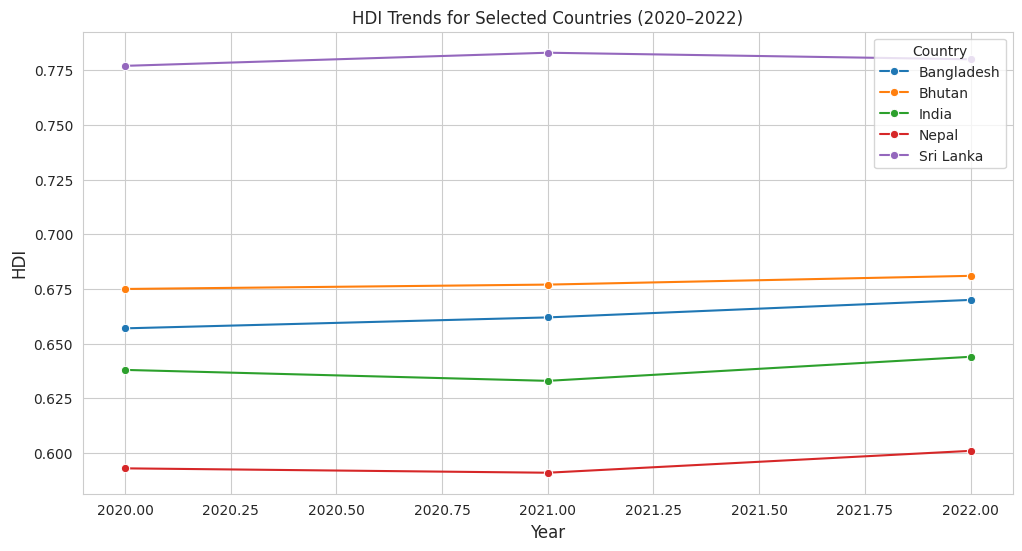

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=plottrend_df[trend_df['country'].isin(sa_countries)],
    x='year',
    y='hdi',
    hue='country',
    marker='o',
    palette='tab10'
)

plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.legend(title="Country")
plt.show()


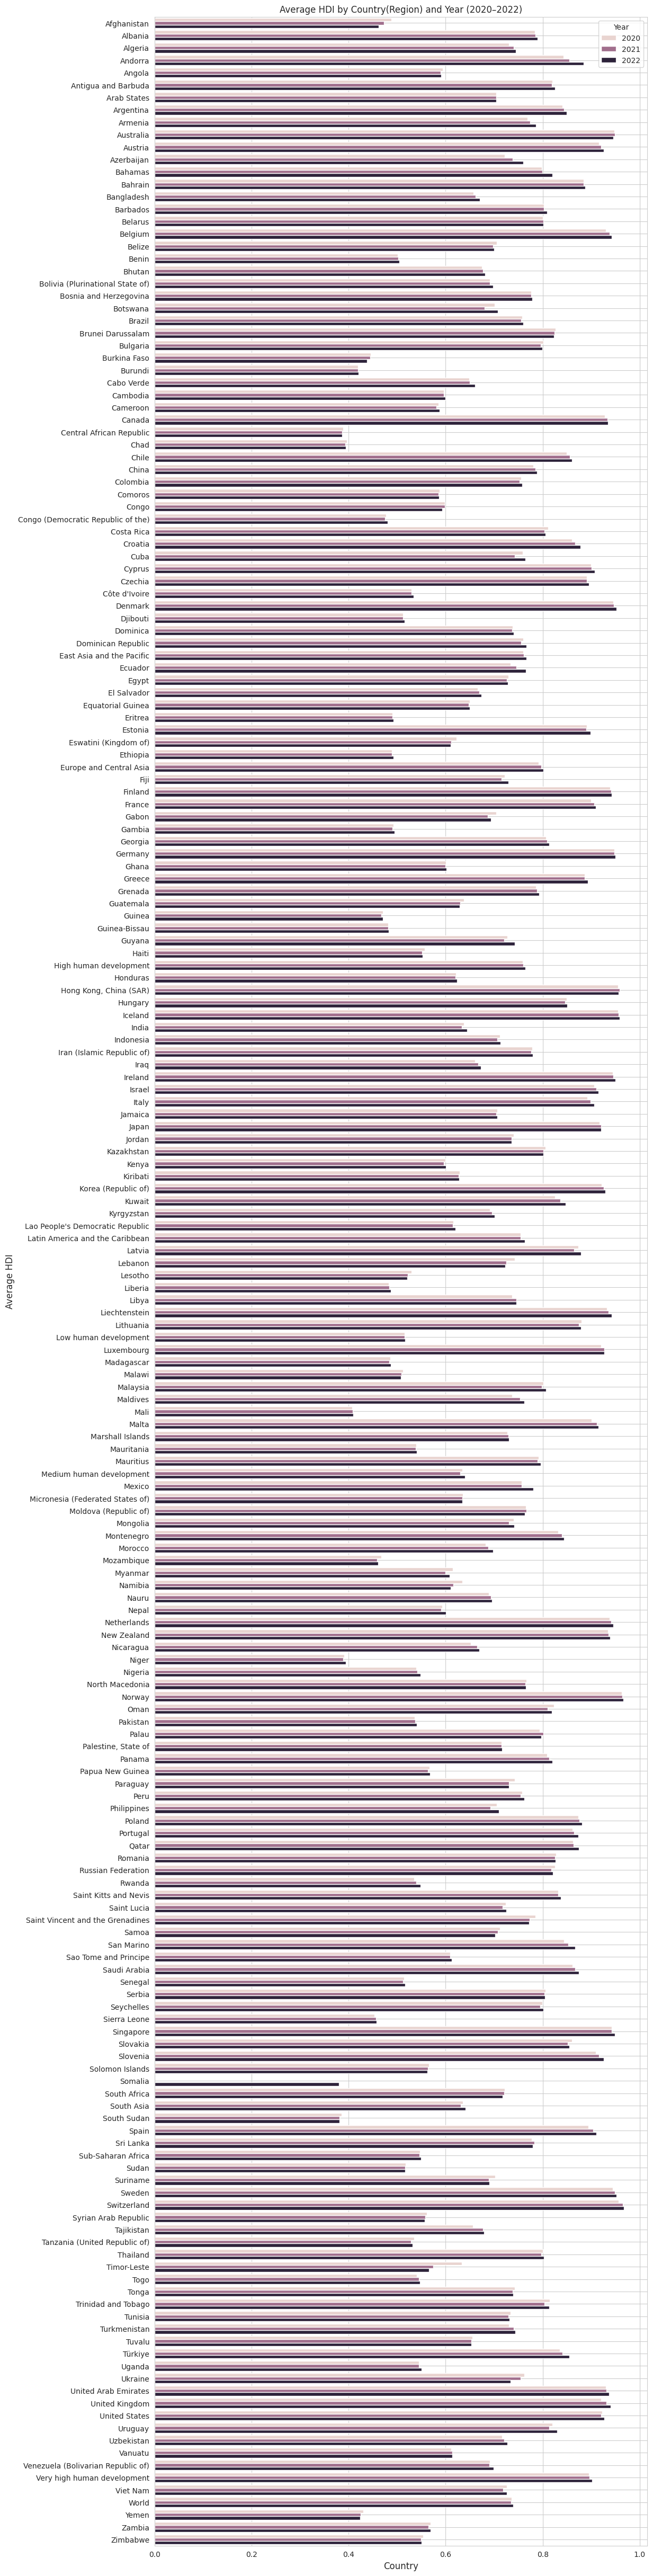

In [ ]:
region_avg = (
    hdi_2020_22_df
    .groupby(['country', 'year'])['hdi']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,62))

sns.barplot(
    data=region_avg,
    x='hdi',
    y='country',
    hue='year',
)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average HDI", fontsize=12)
plt.title("Average HDI by Country(Region) and Year (2020–2022)")
plt.legend(title="Year")
plt.grid(True)
plt.show()

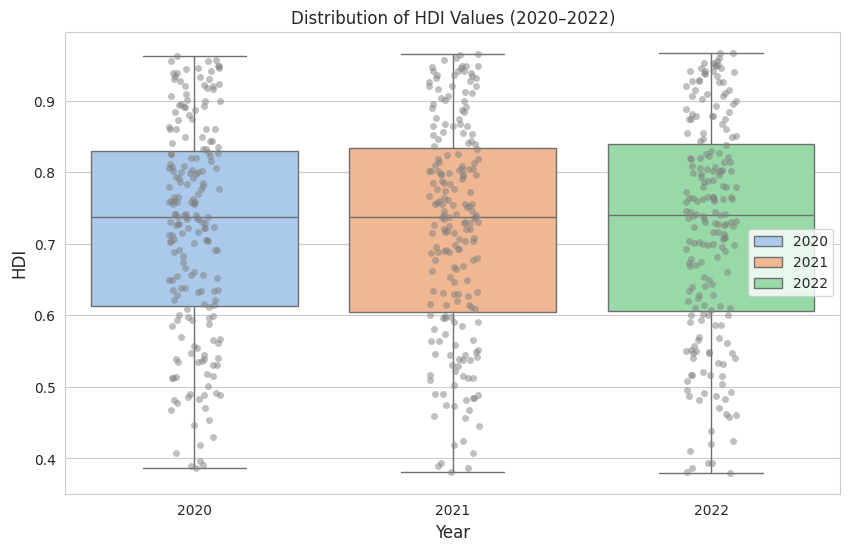

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=hdi_2020_22_df,
    x='year',
    y='hdi',
    hue='year',
    palette='pastel'
)

sns.stripplot(
    data=hdi_2020_22_df,
    x='year',
    y='hdi',
    color='grey',
    alpha = 0.5,
  )

plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.title("Distribution of HDI Values (2020–2022)")
plt.show()



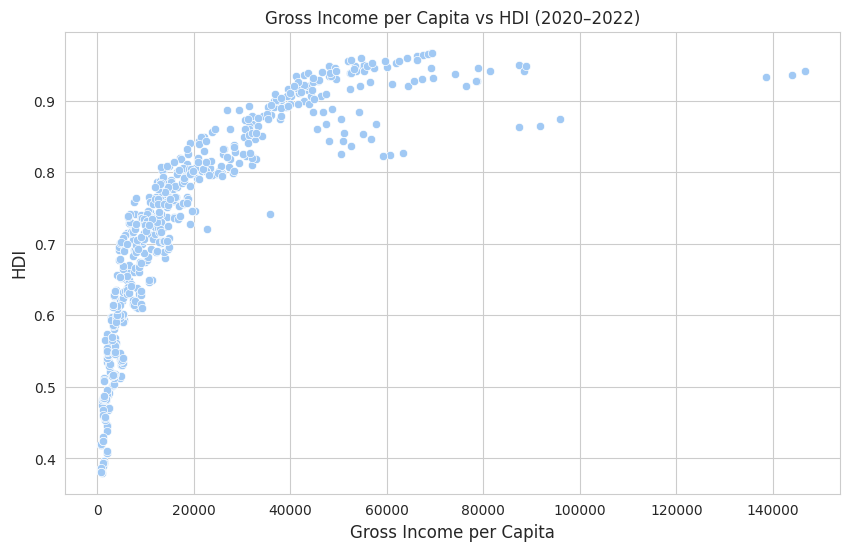

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data = hdi_2020_22_df,
    x ='gross_inc_percap',
    y = 'hdi',
)

plt.xlabel("Gross Income per Capita", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.title("Gross Income per Capita vs HDI (2020–2022)")
plt.show()

In [ ]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = hdi_dataset[hdi_dataset['country'].isin(south_asia_countries)]

print(
    f"{len(south_asia_df)} entries found out of "
    f"{len(south_asia_countries)} South Asian countries."
 )

south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)
print("Successfully Saved the updated dataset in HDI_SouthAsia.csv")

264 entries found out of 8 South Asian countries.
Successfully Saved the updated dataset in HDI_SouthAsia.csv


In [ ]:
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']

for col in numeric_cols:
    if col in south_asia_df.columns:

        if south_asia_df[col].isnull().sum() > 0:

            skewness = south_asia_df[col].skew()
            if abs(skewness) > 1:
                fill_value = south_asia_df[col].median()
                print(f"{col} is skewed (skew={skewness:.2f}). Filling missing values with median: {fill_value}")
            else:
                fill_value = south_asia_df[col].mean()
                print(f"{col} is not skewed (skew={skewness:.2f}). Filling missing values with mean: {fill_value}")
            south_asia_df[col] = south_asia_df[col].fillna(fill_value)

hdi is not skewed (skew=0.03). Filling missing values with mean: 0.5516485355648535
gender_development is not skewed (skew=-0.68). Filling missing values with mean: 0.8328778280542987


/tmp/ipython-input-2347214518.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df[col] = south_asia_df[col].fillna(fill_value)


/tmp/ipython-input-4202966528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite_Score'] = (


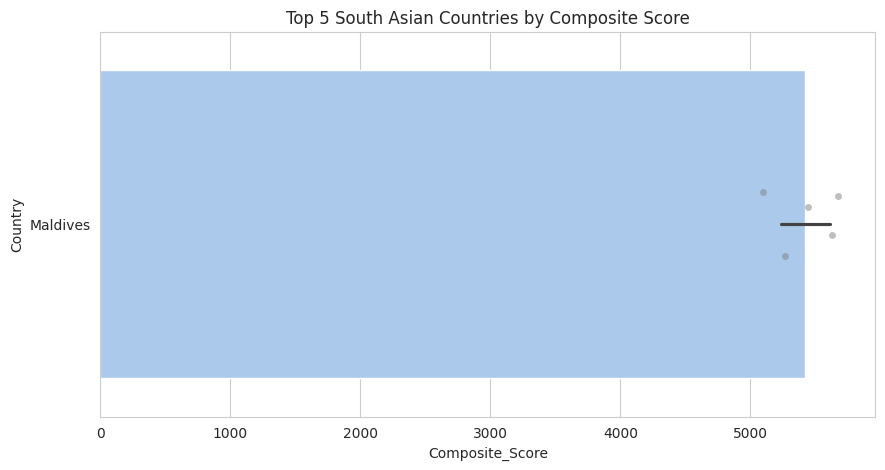

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score
3530,3531,MDV,Maldives,2022,0.762,80.839,0.523787,0.748233,0.767001,81.844,80.065,12.177951,13.333481,11.231514,7.762393,7.869674,7.655778,18846.79219,12160.79560,23783.29128,0.976,0.328,46.928068,46.269366,4.597701,95.402299,53.34,78.21,3.299409,NaN,5678.289357
3527,3528,MDV,Maldives,2019,0.753,80.116,0.504508,0.753833,0.752974,81.162,79.323,12.168620,13.271280,11.262660,7.421843,7.491472,7.351868,18679.92536,16103.37002,20560.79733,1.001,0.336,45.125182,44.598528,4.597701,95.402299,50.61,78.60,3.870900,NaN,5628.012408
3526,3527,MDV,Maldives,2018,0.747,80.013,0.489758,0.727985,0.754359,81.074,79.210,12.159311,13.209945,11.294066,7.096234,7.131445,7.060021,18055.72465,10856.64046,23316.87079,0.965,0.328,43.322295,42.927689,5.882353,94.117647,48.22,77.62,3.553592,NaN,5440.721295
3525,3526,MDV,Maldives,2017,0.740,79.943,0.472442,0.719525,0.748967,81.058,79.102,12.150001,13.148609,11.325471,6.784910,6.788720,6.779760,17474.64201,10226.30166,22787.05892,0.961,0.336,41.519409,41.256851,5.882353,94.117647,45.84,76.65,3.202933,NaN,5266.375503
3524,3525,MDV,Maldives,2016,0.734,79.872,0.454253,0.728061,0.738190,80.814,79.146,12.140692,13.087273,11.356877,6.512264,6.492385,6.531175,16911.45422,13569.38303,19370.04784,0.986,0.355,39.018824,39.120798,5.882353,94.117647,43.45,75.67,3.161901,NaN,5097.397866


In [ ]:
south_asia_df['Composite_Score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)

south_asia_df = south_asia_df.sort_values(by='Composite_Score',ascending=False)

top5_countries_hdi = south_asia_df.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    data = top5_countries_hdi,
    x='Composite_Score',
    y='country')

sns.stripplot(
    data=top5_countries_hdi,
    x='Composite_Score',
    y='country',
    color='grey',
    alpha=0.5
)

plt.xlabel('Composite_Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

top5_countries_hdi

HDI Outliers: []
GNI Outliers: ['Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Maldives', 'Sri Lanka']



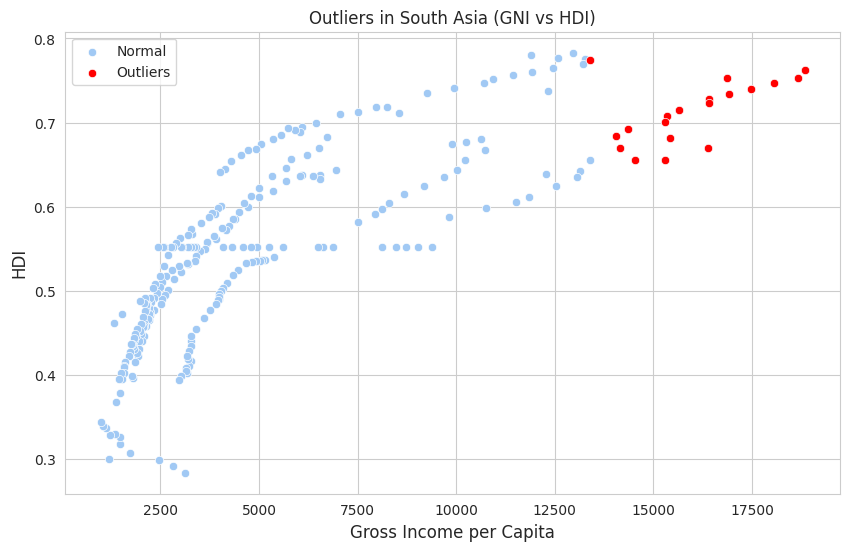

In [ ]:
# Outlier Detection (1.5 * IQR Rule)
def outliers_detection(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

hdi_outliers = outliers_detection(south_asia_df, 'hdi')
gni_outliers = outliers_detection(south_asia_df, 'gross_inc_percap')

print(f"HDI Outliers: {hdi_outliers['country'].tolist()}")
print(f"GNI Outliers: {gni_outliers['country'].tolist()}\n")

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap',
    y='hdi',
    label='Normal'
    )

if not gni_outliers.empty:
    sns.scatterplot(
        data=gni_outliers,
        x='gross_inc_percap',
        y='hdi',
        color='red',
        label='Outliers')
plt.xlabel('Gross Income per Capita', fontsize=12)
plt.ylabel('HDI', fontsize=12)
plt.title('Outliers in South Asia (GNI vs HDI)')
plt.legend()
plt.show()

Pearson Correlation with HDI:
gender_development    0.746607
life_expectancy       0.932578
hdi                   1.000000
Name: hdi, dtype: float64


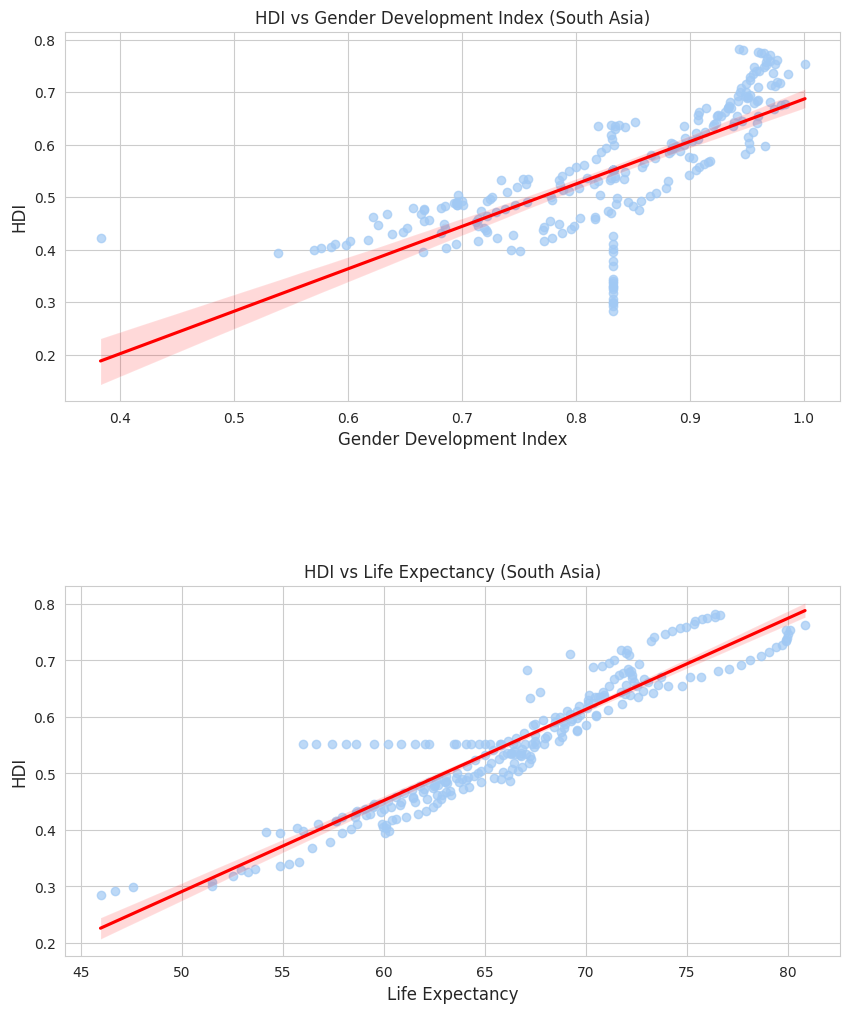

In [ ]:
# Selecting relevant columns
hdi_metrics_df = south_asia_df[
    ['gender_development', 'life_expectancy', 'hdi']
]

# Pearson correlation
hdi_metric_correlations = hdi_metrics_df.corr(method='pearson')

print("Pearson Correlation with HDI:")
print(hdi_metric_correlations['hdi'])

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot: Gender Development vs HDI
sns.regplot(
    x='gender_development',
    y='hdi',
    data=south_asia_df,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'},
    ax=axes[0]
)
axes[0].set_xlabel("Gender Development Index", fontsize=12)
axes[0].set_ylabel("HDI", fontsize=12)
axes[0].set_title("HDI vs Gender Development Index (South Asia)")

# Plot: Life Expectancy vs HDI
sns.regplot(
    x='life_expectancy',
    y='hdi',
    data=south_asia_df,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'},
    ax=axes[1]
)
axes[1].set_xlabel("Life Expectancy", fontsize=12)
axes[1].set_ylabel("HDI", fontsize=12)
axes[1].set_title("HDI vs Life Expectancy (South Asia)")

plt.subplots_adjust(hspace=0.5)

plt.show()


Top 3 Positive Gaps:


,country,GNI_HDI_Gap
3530,Maldives,18846.03019
3527,Maldives,18679.17236
3526,Maldives,18054.97765



Top 3 Negative Gaps:


,country,GNI_HDI_Gap
9,Afghanistan,1121.985570
10,Afghanistan,1047.002686
11,Afghanistan,980.789554


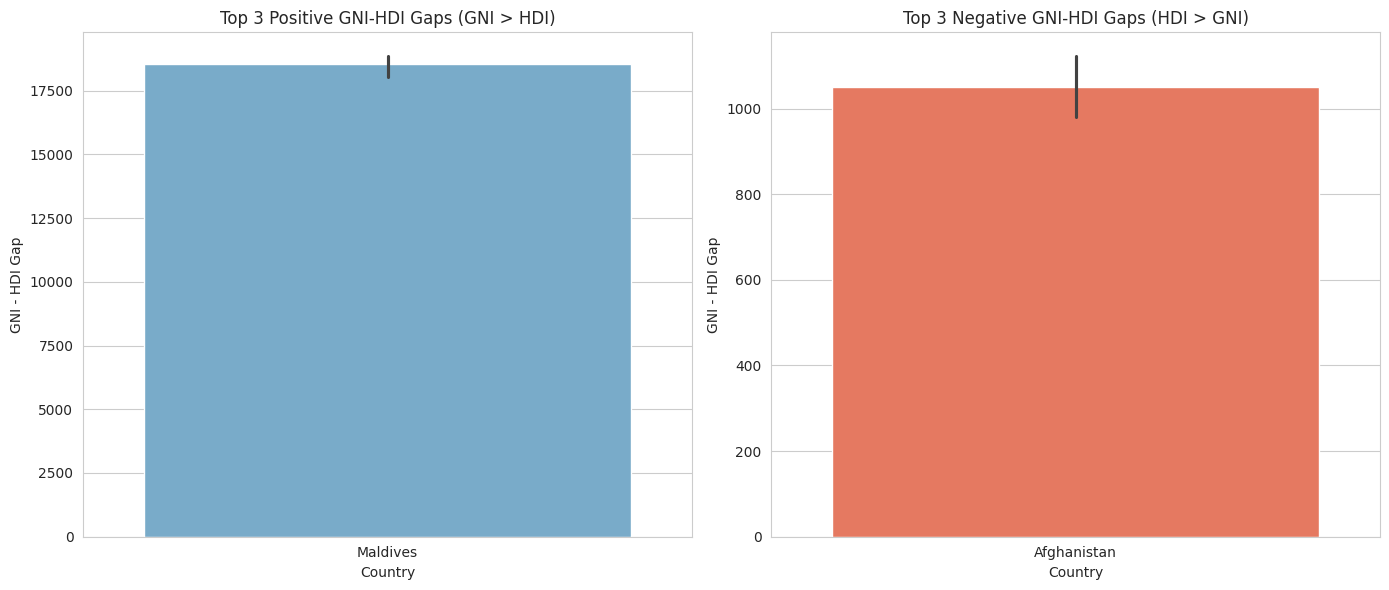

In [ ]:
# Gap = GNI - HDI
south_asia_df['GNI_HDI_Gap'] = (
    south_asia_df['gross_inc_percap'] - south_asia_df['hdi']
)

south_asia_df = south_asia_df.sort_values(by='GNI_HDI_Gap', ascending=False)

# Top 3 positive gaps
top_positive_gap = south_asia_df.head(3)

# Top 3 negative gaps
top_negative_gap = south_asia_df.tail(3)

print("Top 3 Positive Gaps:")
display(top_positive_gap[['country', 'GNI_HDI_Gap']])

print("\nTop 3 Negative Gaps:")
display(top_negative_gap[['country', 'GNI_HDI_Gap']])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive gaps plot
sns.barplot(
    data=top_positive_gap,
    x = 'country',
    y = 'GNI_HDI_Gap',
    hue = 'country',
    ax=axes[0],
    palette ='Blues_r'
)
axes[0].set_title("Top 3 Positive GNI-HDI Gaps (GNI > HDI)")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("GNI - HDI Gap")

# Negative gaps plot
sns.barplot(
    data=top_negative_gap,
    x = 'country',
    y = 'GNI_HDI_Gap',
    hue = 'country',
    ax=axes[1],
    palette ='Reds_r'
)
axes[1].set_title("Top 3 Negative GNI-HDI Gaps (HDI > GNI)")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("GNI - HDI Gap")

plt.tight_layout()
plt.show()

In [ ]:
# Create Subsets (from 2020-2022 Data)
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asia_df_2020_22 = (
    hdi_2020_22_df[hdi_2020_22_df['country'].isin(south_asia_countries)]
)
print("South Asian Countries Data for 2020-2022:")
display(south_asia_df_2020_22.head())
middle_east_df_2020_22 = (
    hdi_2020_22_df[hdi_2020_22_df['country'].isin(middle_east_countries)]
)
print("\nMiddle Eastern Countries Data for 2020-2022:")
display(middle_east_df_2020_22.head())

South Asian Countries Data for 2020-2022:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.84161,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.98507,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.51479,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
459,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,70.187,11.946330,12.406670,11.501720,7.37906,6.755380,8.020810,5822.800881,3272.145361,8413.176878,0.907,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993
460,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,70.599,11.946330,12.406670,11.501720,7.37906,6.755380,8.020810,6220.542581,3518.545078,8966.290086,0.908,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834



Middle Eastern Countries Data for 2020-2022:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
426,427,BHR,Bahrain,2020,0.884,79.174,1.477469,0.863605,0.897164,80.433,78.165,16.391227,16.989664,16.006907,11.046590,10.784370,11.173260,44780.535410,31548.344340,52788.58217,0.963,0.197,79.903572,83.080162,18.750000,81.250000,41.85,85.54,25.310785,23.5735
427,428,BHR,Bahrain,2021,0.884,78.760,1.463266,0.842563,0.901353,80.018,77.757,16.345454,16.998037,15.868633,11.046590,10.784370,11.173260,46757.302760,21717.935170,62040.68089,0.935,0.192,79.903572,83.080162,18.750000,81.250000,42.43,85.77,26.053039,19.6832
428,429,BHR,Bahrain,2022,0.888,79.246,1.472233,0.847334,0.904299,80.497,78.242,16.299681,17.006411,15.730360,11.046590,10.784370,11.173260,48731.445640,22722.178520,64699.53364,0.937,0.181,79.903572,83.080162,22.500000,77.500000,42.43,85.77,26.053039,20.3063
2670,2671,IRQ,Iraq,2020,0.661,69.123,42.556984,0.557776,0.711412,71.185,66.954,12.222756,11.643529,12.772393,6.811879,5.648159,7.995557,8749.302168,2003.301818,15483.21171,0.784,0.569,25.299578,40.352954,26.443769,73.556231,10.87,69.29,3.755912,5.8825
2671,2672,IRQ,Iraq,2021,0.667,70.378,43.533592,0.560132,0.717141,72.422,68.200,12.222756,11.643529,12.772393,6.811879,5.648159,7.995557,8684.231347,1930.380019,15419.11248,0.781,0.563,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.0368
